In [68]:
import pandas as pd
import numpy as np
import warnings
import concurrent.futures
#import missingno as msno
import MetaTrader5 as mt5

pd.options.display.max_columns = 100000
warnings.filterwarnings('ignore')

if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()
else:
    print("MT5 successfully initialised.\n")

MT5 successfully initialised.



In [119]:
df = pd.DataFrame(mt5.copy_ticks_from('CIMB[A]',1, 500000, mt5.COPY_TICKS_TRADE))
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)
df.tail(20)
#88 sell
#56 buy

,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,
2023-08-25 15:08:59,0.0,0.0,5.60,6000,1692976139202,56,6000.0
2023-08-25 15:09:45,0.0,0.0,5.60,10300,1692976185193,56,10300.0
2023-08-25 15:10:07,0.0,0.0,5.60,3000,1692976207051,56,3000.0
2023-08-25 15:10:12,0.0,0.0,5.59,100,1692976212483,88,100.0
2023-08-25 15:10:27,0.0,0.0,5.59,100,1692976227502,88,100.0
2023-08-25 15:10:28,0.0,0.0,5.60,6700,1692976228535,56,6700.0
2023-08-25 15:10:55,0.0,0.0,5.59,100,1692976255005,88,100.0
2023-08-25 15:10:55,0.0,0.0,5.60,4600,1692976255683,56,4600.0
2023-08-25 15:11:15,0.0,0.0,5.60,3500,1692976275194,56,3500.0


In [113]:
# Identify rows at 09:00:00
mask_0900_indices = df.index[df.index.time == pd.Timestamp('09:00:00').time()]

# Create an empty mask with all False values
final_mask = pd.Series(False, index=df.index)

# For each 09:00:00 timestamp, mark the row and its immediate predecessor
for timestamp in mask_0900_indices:
    idx = df.index.get_loc(timestamp)
    
    # Check if idx is a slice (due to duplicate timestamps)
    if isinstance(idx, slice):
        start, stop = idx.start, idx.stop
        final_mask.iloc[start-1:stop+1] = True
    else:
        # Set the current and previous index to True
        final_mask.iloc[idx-1:idx+1] = True

# Filter the dataframe using the final mask
filtered_df = df[final_mask]

filtered_df.tail(30)


,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,
2023-08-07 16:53:37,0.0,0.0,5.52,3000,1691427217707,344,3000.0
2023-08-08 09:00:00,0.0,0.0,5.52,2100,1691485200000,312,2100.0
2023-08-08 16:59:31,0.0,0.0,5.60,1000,1691513971325,344,1000.0
2023-08-09 09:00:00,0.0,0.0,5.60,12100,1691571600000,312,12100.0
2023-08-09 16:54:39,0.0,0.0,5.65,1000,1691600079457,312,1000.0
2023-08-10 09:00:00,0.0,0.0,5.65,100,1691658000000,312,100.0
2023-08-10 16:50:00,0.0,0.0,5.66,889500,1691686200000,312,889500.0
2023-08-11 09:00:00,0.0,0.0,5.65,300,1691744400000,312,300.0
2023-08-11 16:59:17,0.0,0.0,5.61,1000,1691773157638,344,1000.0


In [183]:
# Defining flag values
TICK_FLAG_BID = 2
TICK_FLAG_ASK = 4
TICK_FLAG_LAST = 8
TICK_FLAG_VOLUME = 16
TICK_FLAG_BUY = 32
TICK_FLAG_SELL = 64

def interpret_flags(flags):
    # Check which flags are set
    interpretations = []
    if flags & TICK_FLAG_BID:
        interpretations.append("TICK_FLAG_BID")
    if flags & TICK_FLAG_ASK:
        interpretations.append("TICK_FLAG_ASK")
    if flags & TICK_FLAG_LAST:
        interpretations.append("TICK_FLAG_LAST")
    if flags & TICK_FLAG_VOLUME:
        interpretations.append("TICK_FLAG_VOLUME")
    if flags & TICK_FLAG_BUY:
        interpretations.append("TICK_FLAG_BUY")
    if flags & TICK_FLAG_SELL:
        interpretations.append("TICK_FLAG_SELL")
    
    return interpretations

# Test with a flag value
flags_value = 120
interpreted_flags = interpret_flags(flags_value)
print(f"Interpretation of {flags_value} is {interpreted_flags}.")


Interpretation of 120 is ['TICK_FLAG_LAST', 'TICK_FLAG_VOLUME', 'TICK_FLAG_BUY', 'TICK_FLAG_SELL'].


In [178]:
df['flags'].value_counts(normalize=True)

344    0.521161
312    0.464465
376    0.012015
88     0.001321
56     0.000997
120    0.000042
Name: flags, dtype: float64

In [174]:
# Step 1: Filter the DataFrame
filtered_df = df[(df.index.time >= pd.Timestamp('09:00:00').time()) & 
                 (df.index.time <= pd.Timestamp('09:00:10').time())]

# Step 2: Append the row just before 09:00:00
previous_row = df[df.index.time < pd.Timestamp('09:00:00').time()].tail(1)
filtered_df = previous_row.append(filtered_df)

# Step 3: Compute momentum and volume_momentum
filtered_df['momentum'] = filtered_df['last'] - filtered_df['last'].shift(5)
filtered_df['volume_momentum'] = filtered_df['volume'] - filtered_df['volume'].shift(5)

#normalize
number_of_unique_flags = filtered_df['flags'].value_counts(normalize=True)

print(number_of_unique_flags)


344    0.477124
312    0.455338
376    0.058824
56     0.004357
88     0.004357
Name: flags, dtype: float64


In [91]:
previous_row

,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,


<Axes: xlabel='time'>

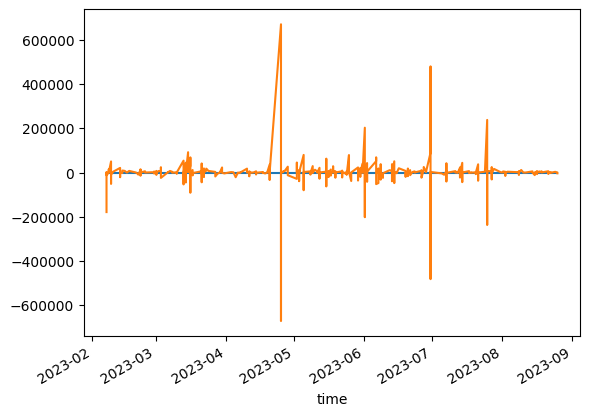

In [86]:
filtered_df.momentum.plot()
filtered_df.volume_momentum.plot()